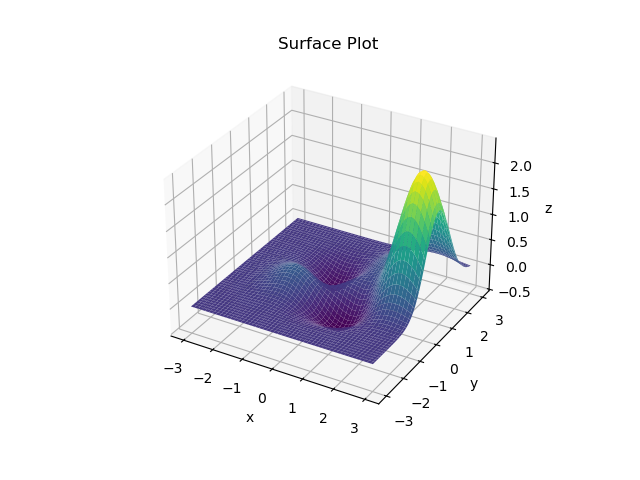

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

a1, a2, a3 = 1.5, 0.6, 0.7
a4, a5, a6 = 0.8, 1.2, 0.99

# linear spacing for domain of functions
xRange = np.linspace(-3, 3, 100)
yRange = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xRange,yRange)

# surface
Z = (a1*X*Y - a2*X**3 - a3*Y**2) *np.exp(-X**2 - Y**2) + (a4*X**2 - a5*X*Y + a6*Y**2)*np.exp(-(X-2)**2 -(Y-1)**2)

plt.close("all")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Surface Plot")
plt.show()

## This section is for contour plotting ##

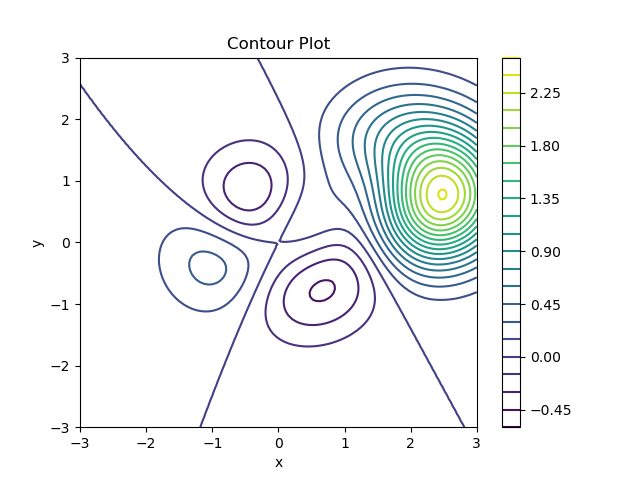

In [9]:
#Contour plot
plt.figure()
plt.contour(X,Y,Z,20,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title("Contour Plot")
plt.show()

In [53]:
# numerical calculations
import scipy.optimize
from scipy.optimize import minimize

# objective function 
def f(x) :
    return (a1*x[0]*x[1] - a2*x[0]**3 - a3*x[1]**2) *np.exp(-x[0]**2 - x[1]**2) + (a4*x[0]**2 - a5*x[0]*x[1] + a6*x[1]**2)*np.exp(-(x[0]-2)**2 -(x[1]-1)**2)

# initial guess
x0 = np.array([0.5, -1])

result = minimize(f, x0, method="CG")

print("Optimization successful: ", result.success)
print("Minimum value (fun):", result.fun)
print("Optimal parameters (x): ", result.x)
print("Number of iterations: ", result.nit)

Optimization successful:  True
Minimum value (fun): -0.4715710041522675
Optimal parameters (x):  [ 0.66611993 -0.78024662]
Number of iterations:  5


In [11]:
# Maximum values found using the negative function values and scipy.optimize.minimize() 

def negF(x) :
    return -1* ((a1*x[0]*x[1] - a2*x[0]**3 - a3*x[1]**2) *np.exp(-x[0]**2 - x[1]**2) + (a4*x[0]**2 - a5*x[0]*x[1] + a6*x[1]**2)*np.exp(-(x[0]-2)**2 -(x[1]-1)**2))

# initial guess
x1 = np.array([2.519, 0.769])

result2 = minimize(negF, x1, method="CG")

print("Optimization successful: ", result2.success)
print("Maximum value (fun):", -1*result2.fun)
print("Optimal parameters (x): ", result2.x)
print("Number of iterations: ", result2.nit)

Optimization successful:  True
Maximum value (fun): 2.4146918820216965
Optimal parameters (x):  [2.47926012 0.77939788]
Number of iterations:  3


In [52]:
# code sample from google ai

# gradient
import sympy as sp
from sympy import diff, init_printing
from scipy.optimize import fsolve
init_printing(use_unicode=True)

x, y = sp.symbols('x y')
f = (a1*x*y - a2*x**3 - a3*y**2)*sp.exp(((-x**2)-(y**2))) + (a4*x**2 - a5*x*y + a6*y**2)*sp.exp((-(x-2)**2 -((y-1)**2)))
# symbolic partials
df_dx_sym = diff(f, x)
df_dy_sym = diff(f, y)

# convert to numeric
df_dx = sp.lambdify((x,y), df_dx_sym, 'numpy')
df_dy = sp.lambdify((x,y), df_dy_sym, 'numpy')

def gradient(inputPoints) :
    xVal, yVal = inputPoints
    return [df_dx(xVal, yVal), df_dy(xVal, yVal)]

initialGuess = [0.7,-0.8]

critPt = fsolve(gradient, initialGuess)

# symbolic partials
df_dx_sym2 = diff(df_dx_sym, x)
df_dy_sym2 = diff(df_dy_sym, y)
df_dxdy_sym = diff(df_dx_sym, y)

# convert to numeric
df_dx2 = sp.lambdify((x,y), df_dx_sym2, 'numpy')
df_dy2 = sp.lambdify((x,y), df_dy_sym2, 'numpy')
df_dxdy = sp.lambdify((x,y), df_dxdy_sym, 'numpy')

xCrit = critPt[0]
yCrit = critPt[1]

hessianMatrix = np.array([[df_dx2(xCrit, yCrit), df_dxdy(xCrit, yCrit)],
                         [df_dxdy(xCrit, yCrit), df_dy2(xCrit, yCrit)]])

det = np.linalg.det(hessianMatrix)

if det < 0:
    print(f"The critical point at {critPt} is a saddle.")
elif det > 0:
    print("max or min")
    print(critPt)
else :
    print("Not enough info")


max or min
[ 0.66612589 -0.7802442 ]
